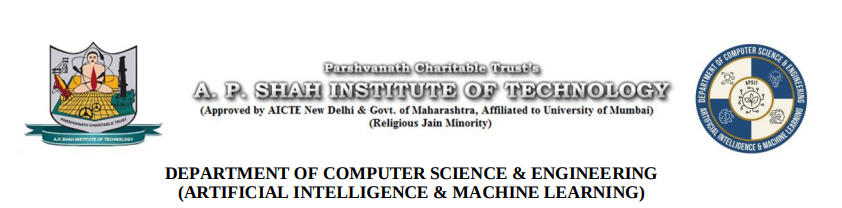

Date: 20/03/2024

Nehali Palkar \
Batch: A2 \
Roll No. 38 \
Moodle ID: 21106057 \

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
df = pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [ ]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
# Cleaning up the data
df.columns = ["Month", "Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
# Drop last 2 rows
df.drop(106, axis=0, inplace=True)

In [ ]:
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [ ]:
# Convert motnh into datetime

df['Month'] = pd.to_datetime(df['Month'])

In [ ]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [ ]:
df.set_index('Month', inplace=True)

In [ ]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [ ]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<Axes: xlabel='Month'>

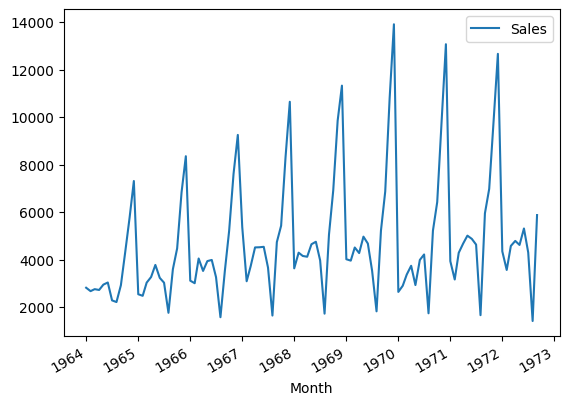

In [ ]:
df.plot()

In [ ]:
# Testing for stationarity

from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result = adfuller(df['Sales'])

In [ ]:
# H0: It is non stationary
# H1: It is stationary

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (H0), reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("Weak evidence against null hypothesis, time series ha a unit root, indicating it is non-stationary")

In [ ]:
adfuller_test(df['Sales'])

ADF Test Statistic : nan
p-value : nan
#Lags Used : 0
Number of Observations Used : 105
Weak evidence against null hypothesis, time series ha a unit root, indicating it is non-stationary


In [ ]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift()

In [ ]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
NaT           5877.0
Name: Sales, Length: 106, dtype: float64

In [ ]:
df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(12)

In [ ]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [ ]:
#  Again test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
Strong evidence against the null hypothesis (H0), reject the null hypothesis. Data has no unit root and is stationary.


<Axes: xlabel='Month'>

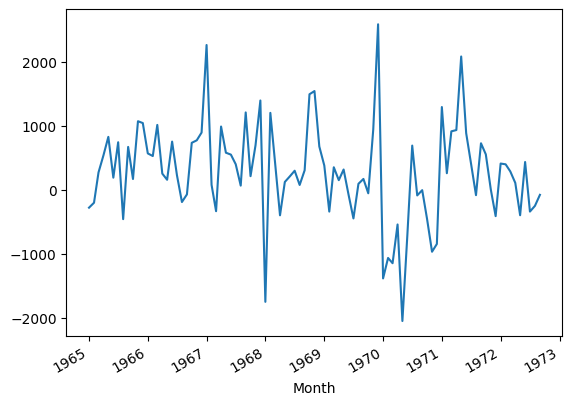

In [ ]:
df['Seasonal First Difference'].plot()

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.tsa.statespace.SARIMAX(df['Sales'], order=(1, 1, 1), seasonsal_order=(1,1,1,12))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonsal_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Month'>

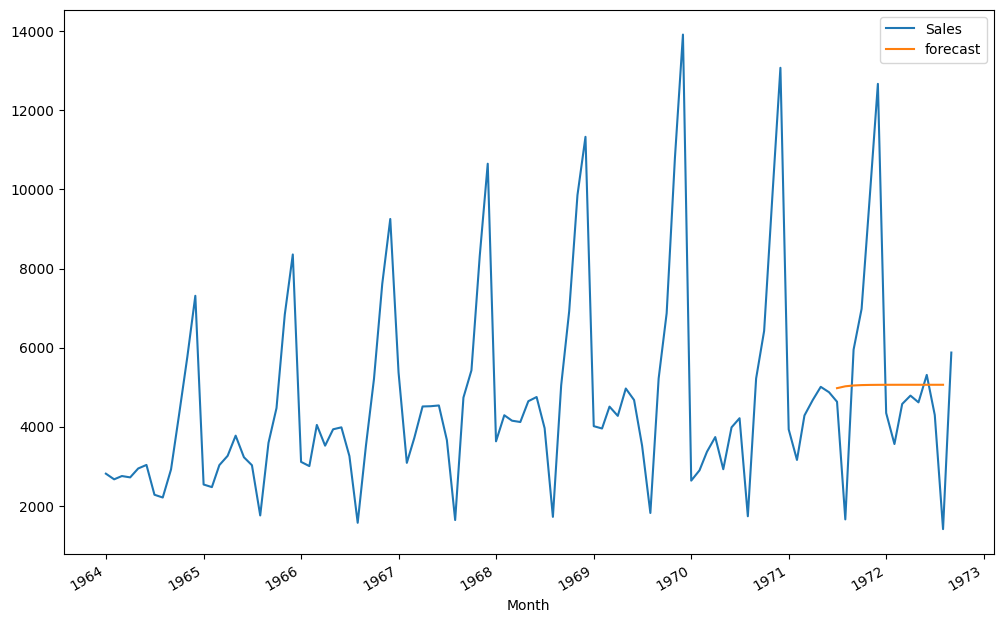

In [ ]:
df['forecast'] = results.predict(start=90, end=103, dynamic=True)
df[['Sales', 'forecast']].plot(figsize=(12, 8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(months = x) for x in range(0, 60)]

In [ ]:
future_datest_df = pd.DataFrame(index=future_dates[1:], columns=df.columns)

In [ ]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
NaT,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN


In [ ]:
future_df = pd.concat([df, future_datest_df])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: >

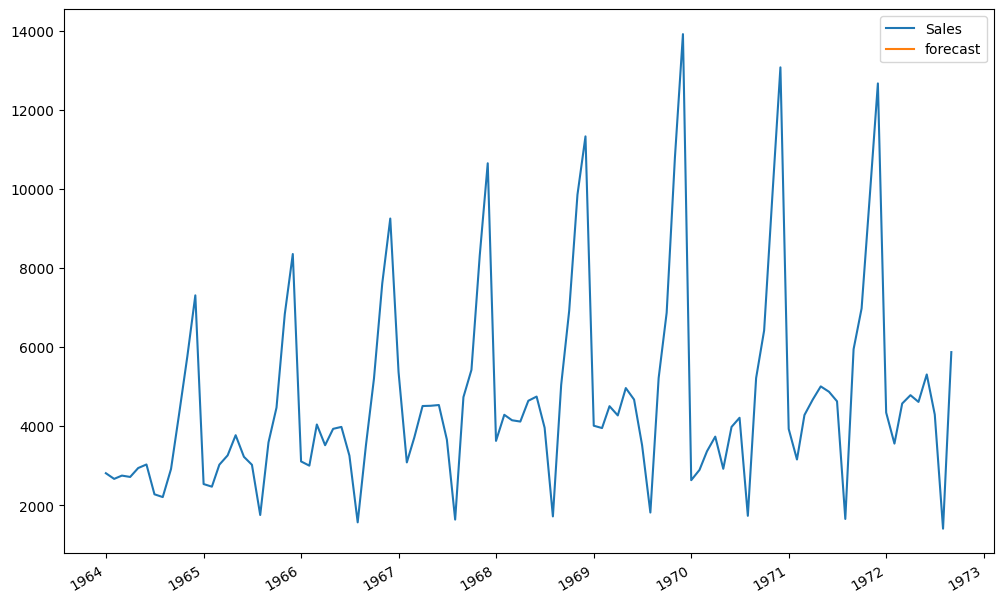

In [ ]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic = True)
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))